In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import scale
from scipy.sparse import lil_matrix, csr_matrix, vstack
import pdb
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def generate_graph(num_nodes, p, k=None, graph_type=1):
    if graph_type == 1:
        G = nx.fast_gnp_random_graph(n=num_nodes, p=p)
    elif graph_type == 2:
        G = nx.watts_strogatz_graph(n=num_nodes, k=k, p=p)
    elif graph_type == 3:
        G = nx.newman_watts_strogatz_graph(n=num_nodes, k=k, p=p)
    elif graph_type == 4:
        G = nx.connected_watts_strogatz_graph(n=num_nodes, k=k, p=p)
    return G

def generate_dataset(probs_list, graph_params, draw_sample=True):
    graphs_train = []
    labels_train = []
    graphs_test = []
    labels_test = []

    graph_type = graph_params["graph_type"]
    graphs_per_class = graph_params["graphs_per_class"]
    num_nodes = graph_params["num_nodes"]
    knn = graph_params["knn"]
    graph_edge_width = graph_params["graph_edge_width"]
    
    for class_type, prob in enumerate(probs_list):
        for i in range(graphs_per_class):
            G_train = generate_graph(num_nodes, prob, knn, graph_type=graph_type)
            G_test = generate_graph(num_nodes, prob, knn, graph_type=graph_type)
            graphs_train.append(G_train)
            graphs_test.append(G_test)
            labels_train.append(str(prob))
            labels_test.append(str(prob))
        if draw_sample:
            plt.figure(class_type)
            nx.draw_circular(G_train, with_labels=True, font_weight='bold', width=graph_edge_width)
    return graphs_train, labels_train, graphs_test, labels_test

In [2]:
probability_tests = {
    "test1": [0.1, 0.9],
    "test2": [0.3, 0.7],
    "test3": [0.4, 0.6],
    "test4": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

graph_types = {
    "fast_gnp_random_graph": 1,
    "watts_strogatz_graph": 2, # rewires existing edge with prob p
    "newman_watts_strogatz_graph": 3, # adds new edge with prob p
    "connected_watts_strogatz_graph": 4 # rewires existing edge with prob p, but ensures connected graph
}

graph_parameters = {
    "graph_type": graph_types["connected_watts_strogatz_graph"],
    "graphs_per_class": 100,
    "num_nodes": 50, #569 in the Nature study
    "knn": 6, # used in watts-strogatz graphs
    "graph_edge_width": 0.1
}

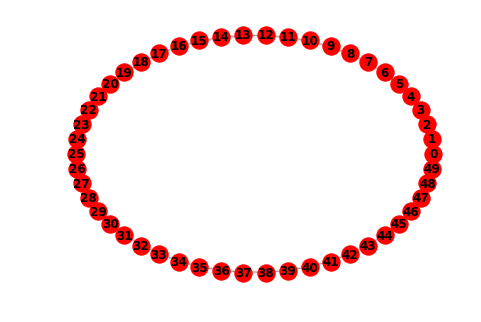

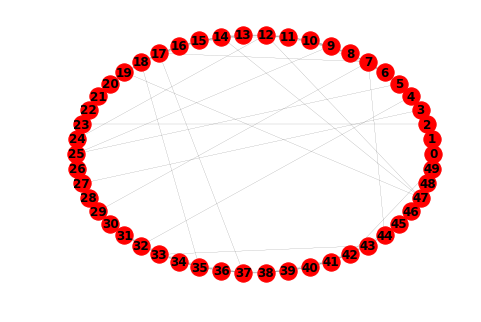

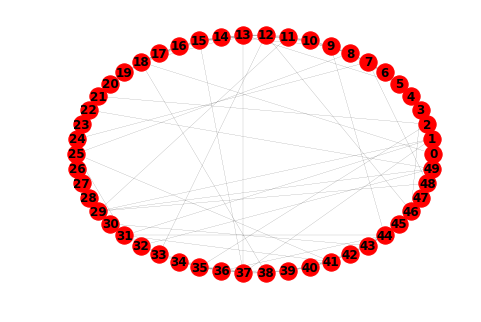

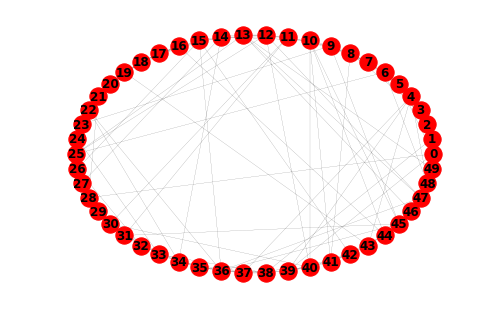

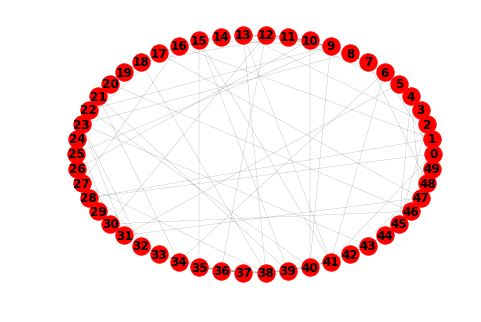

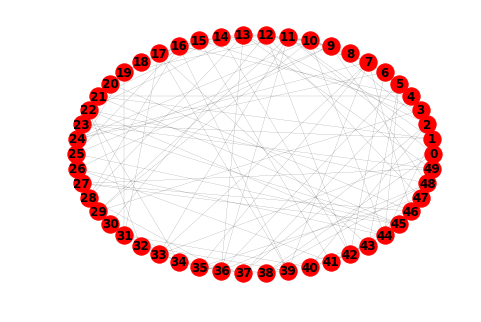

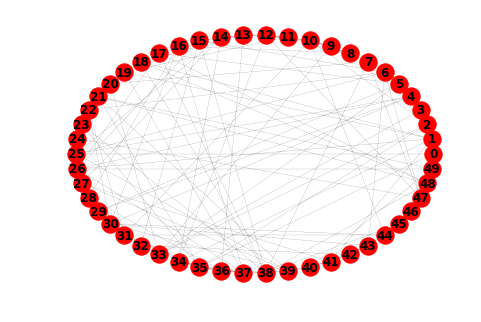

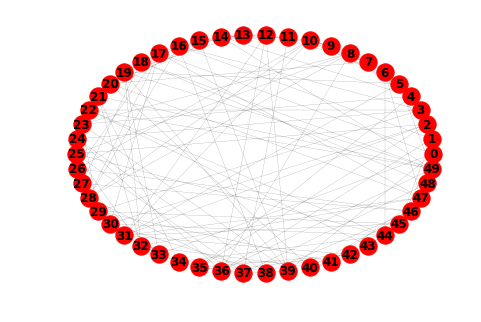

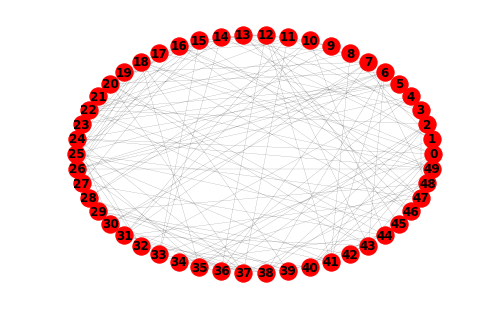

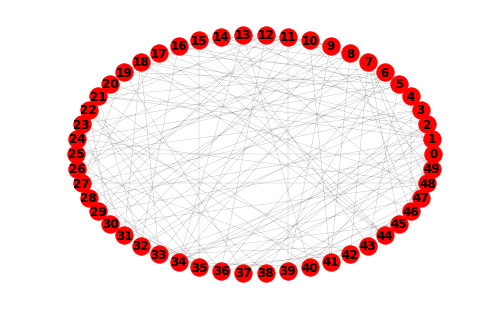

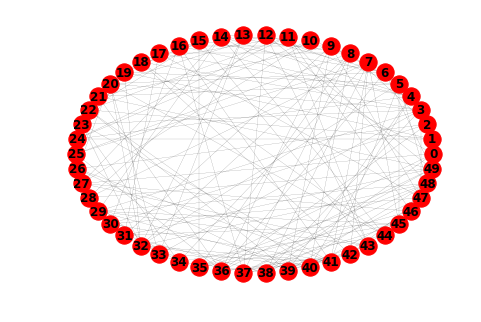

In [3]:
# select probabilities test case
probs = probability_tests["test1"]

# select graph parameters
graph_params = copy.copy(graph_parameters)

# generate training and test samples
graphs_train, labels_train, graphs_test, labels_test = generate_dataset(probs, graph_params, True)

In [4]:
# feature engineering - node degree
X_train = []
X_test = []

for counter, graph in enumerate(graphs_train):
    nx.write_adjlist(graph, "./data/test_1/train/graph_{}_{}.adjlist".format(counter, labels_train[counter]))
    
for counter, graph in enumerate(graphs_test):
    nx.write_adjlist(graph, "./data/test_1/test/graph_{}_{}.adjlist".format(counter, labels_train[counter]))